<a href="https://colab.research.google.com/github/fataik1/fataik1.github.io/blob/master/BuildProject_Back_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import csv

with open('SleepStudy.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are Enough, Hours, PhoneReach, PhoneTime, Tired, Breakfast
	Yes works in the 8 department, and was born in Yes.
	No works in the 6 department, and was born in Yes.
	Yes works in the 6 department, and was born in Yes.
	No works in the 7 department, and was born in Yes.
	No works in the 7 department, and was born in Yes.
	No works in the 7 department, and was born in Yes.
	Yes works in the 7 department, and was born in Yes.
	No works in the 7 department, and was born in Yes.
	No works in the 4 department, and was born in No.
	No works in the 6 department, and was born in Yes.
	No works in the 10 department, and was born in Yes.
	No works in the 7 department, and was born in Yes.
	Yes works in the 7 department, and was born in Yes.
	Yes works in the 8 department, and was born in Yes.
	Yes works in the 7 department, and was born in No.
	Yes works in the 8 department, and was born in Yes.
	Yes works in the 6 department, and was born in Yes.
	Yes works in the 8 department, and w

In [0]:
#Open Up DF
df = pd.read_csv('SleepStudy.csv')

df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [0]:
df.describe()

,Hours,Tired
count,102.000000,104.000000
mean,6.656863,3.076923
std,1.417676,1.011510
min,2.000000,1.000000
25%,6.000000,2.000000
50%,7.000000,3.000000
75%,7.000000,4.000000
max,10.000000,5.000000


Here Below we have a graph that indicates the Hours you slept(Green) and if you were still tired(red).

After doing my research, I found that If you sleep for 8+ hours, there is a high chance you will be tired when you wake up. Another study is, if you sleep for less than 6 hours, you will become more tired. 

The tiredness scales from 1-5. 5 being the most tired and 1 being the least tired. 

In [0]:
#Turn YES_NO to 1 or 0 Numerical
yes_no={"Yes":1,"No":0}
df["Enough"].value_counts(dropna=True)

No     68
Yes    36
Name: Enough, dtype: int64

In [0]:
df["Enough"]=df["Enough"].map(yes_no)
df["Enough"].value_counts(dropna=True)

0    68
1    36
Name: Enough, dtype: int64

In [0]:
yes_no={"Yes":1,"No":0}
df["PhoneReach"].value_counts(dropna=True)

Yes    72
No     32
Name: PhoneReach, dtype: int64

In [0]:
df["PhoneReach"]=df["PhoneReach"].map(yes_no)
df["PhoneReach"].value_counts(dropna=True)

1    72
0    32
Name: PhoneReach, dtype: int64

In [0]:
df["PhoneTime"]=df["PhoneTime"].map(yes_no)
df["PhoneTime"].value_counts(dropna=True)

1    84
0    20
Name: PhoneTime, dtype: int64

In [0]:
yes_no={"Yes":1,"No":0}
df["PhoneTime"].value_counts(dropna=True)

1    84
0    20
Name: PhoneTime, dtype: int64

In [0]:
df["Breakfast"]=df["Breakfast"].map(yes_no)
df["Breakfast"].value_counts(dropna=True)

1    63
0    41
Name: Breakfast, dtype: int64

Text(0.5, 1.0, 'Time Slept Compared to Tiredness')

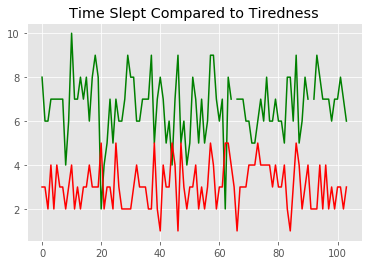

In [0]:
#Wanted to see any correlations
plt.plot(df['Hours'], color = 'green')
plt.plot(df['Tired'], color = 'red')
plt.title('Time Slept Compared to Tiredness')

In [0]:
#Looking to see if there's a difference between going to bed without your phone close or not.
df.groupby(['PhoneReach'])['Hours'].describe()

,count,mean,std,min,25%,50%,75%,max
PhoneReach,,,,,,,,
0,31.0,6.774194,1.667527,2.0,6.0,7.0,8.0,9.0
1,71.0,6.605634,1.303609,2.0,6.0,7.0,7.0,10.0


In [0]:
#wanted to see the counts for each category. semi tired, really tired, kinda both, non tired, tired.
df.groupby(['Tired'])['Hours'].describe()

,count,mean,std,min,25%,50%,75%,max
Tired,,,,,,,,
1,4.0,8.000000,0.816497,7.0,7.75,8.0,8.25,9.0
2,26.0,6.653846,1.468123,4.0,6.00,7.0,7.00,9.0
3,39.0,6.717949,0.971941,5.0,6.00,7.0,7.00,9.0
4,23.0,6.739130,1.251086,5.0,6.00,7.0,7.00,10.0
5,10.0,5.700000,2.584140,2.0,4.25,5.5,7.75,9.0


In [0]:
#wanted to see if you were on your phone before bed and if its in arms reach
df.groupby(['PhoneTime'])['PhoneReach'].describe()

,count,mean,std,min,25%,50%,75%,max
PhoneTime,,,,,,,,
0,20.0,0.55000,0.510418,0.0,0.0,1.0,1.0,1.0
1,84.0,0.72619,0.448591,0.0,0.0,1.0,1.0,1.0


In [0]:
#wanted to see if eating breakfast and got enough sleep correlated. Most people did not eat breakfast.
df.groupby(['Breakfast'])['Enough'].describe()

,count,mean,std,min,25%,50%,75%,max
Breakfast,,,,,,,,
0,41.0,0.268293,0.448575,0.0,0.0,0.0,1.0,1.0
1,63.0,0.396825,0.493169,0.0,0.0,0.0,1.0,1.0


In [0]:
#My head after changing the Strings to Integers. 
df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,1,8.0,1,1,3,1
1,0,6.0,1,1,3,0
2,1,6.0,1,1,2,1
3,0,7.0,1,1,4,0
4,0,7.0,1,1,2,1


In [0]:
#Can see all means for my observations.
df.describe()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000
mean,0.346154,6.656863,0.692308,0.807692,3.076923,0.605769
std,0.478047,1.417676,0.463774,0.396022,1.011510,0.491051
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,6.000000,0.000000,1.000000,2.000000,0.000000
50%,0.000000,7.000000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,7.000000,1.000000,1.000000,4.000000,1.000000
max,1.000000,10.000000,1.000000,1.000000,5.000000,1.000000


In [0]:
#wanted to see the exact value counts for the tired column
df['Tired'].value_counts()

3    40
2    27
4    23
5    10
1     4
Name: Tired, dtype: int64

In [0]:
#Observations and Columns
df.shape

(104, 6)

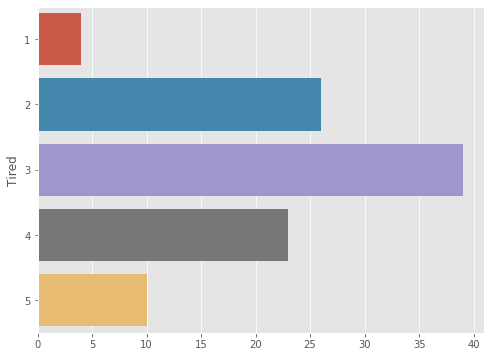

In [0]:
#Wanted to see a graph of the tired column
platGenre = pd.crosstab(df.Tired,df.Hours)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "Still Tired"
plt.show()

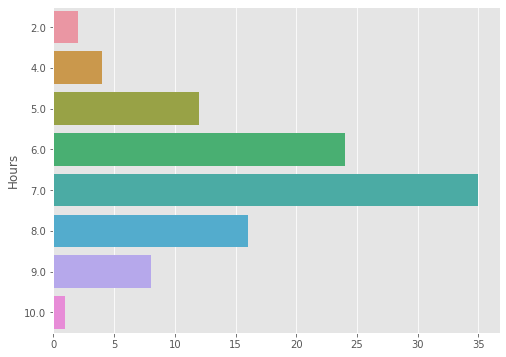

In [0]:
#Students sleeping hrs. 
platGenre = pd.crosstab(df.Hours,df.Tired)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Observations"
plt.xlabel = "The amount of Hours Slept"
plt.show()

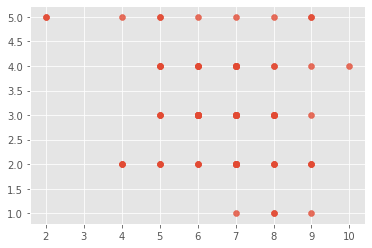

In [0]:
#Looking for a correlation between hours and tired.
plt.scatter(df['Hours'], df['Tired'], alpha=0.8)
plt.show()

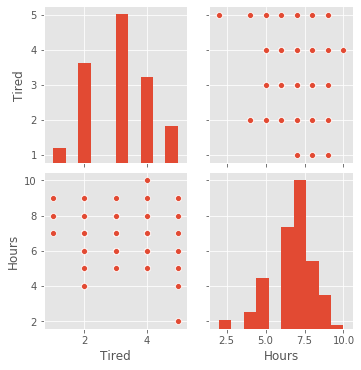

In [0]:
#Different look at the correlation I'm trying to bring
g = sns.pairplot(df, vars=["Tired", "Hours"])


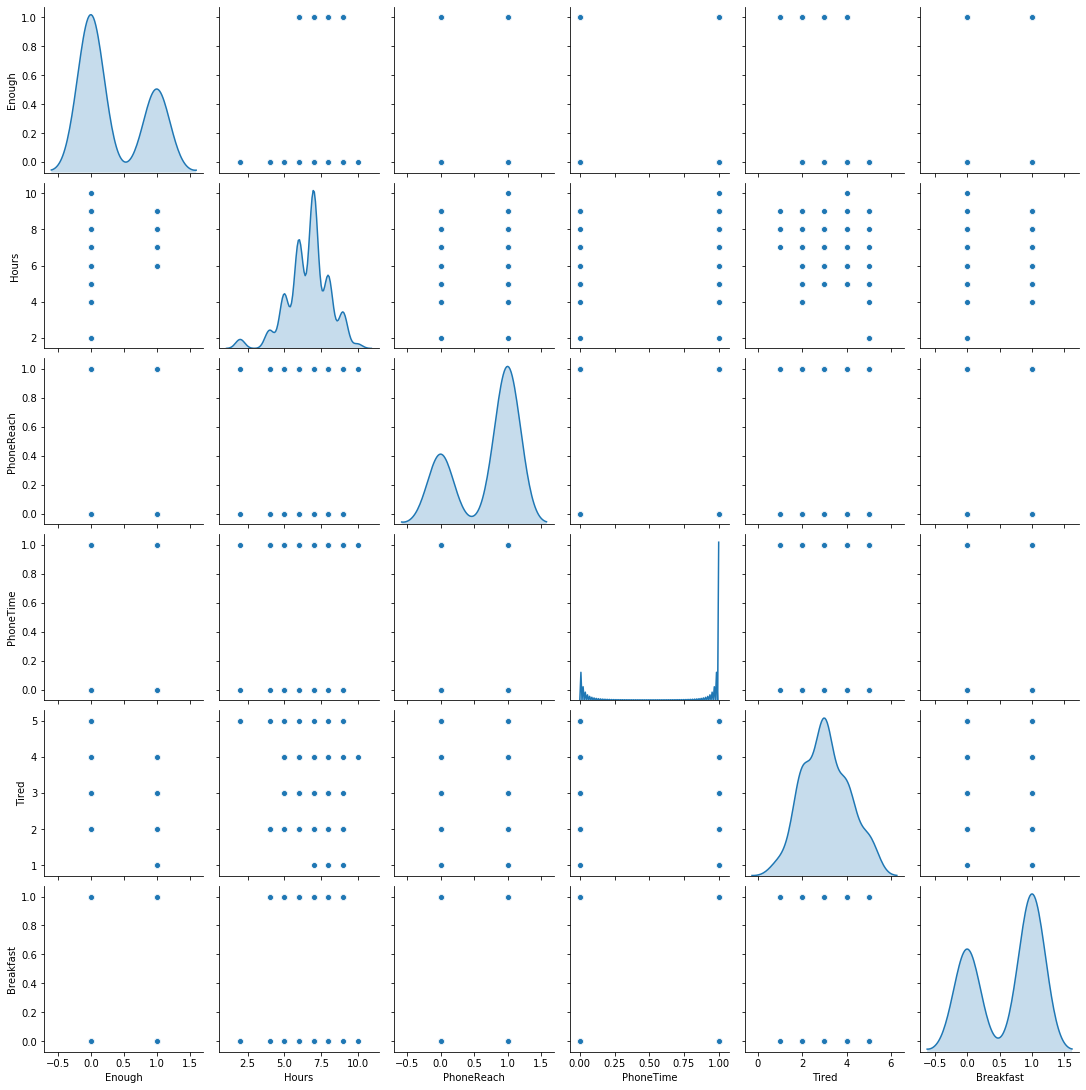

In [0]:
#Graph of the whole DF. The diagnol matches up columns & rows. 
g = sns.pairplot(df, diag_kind="kde")


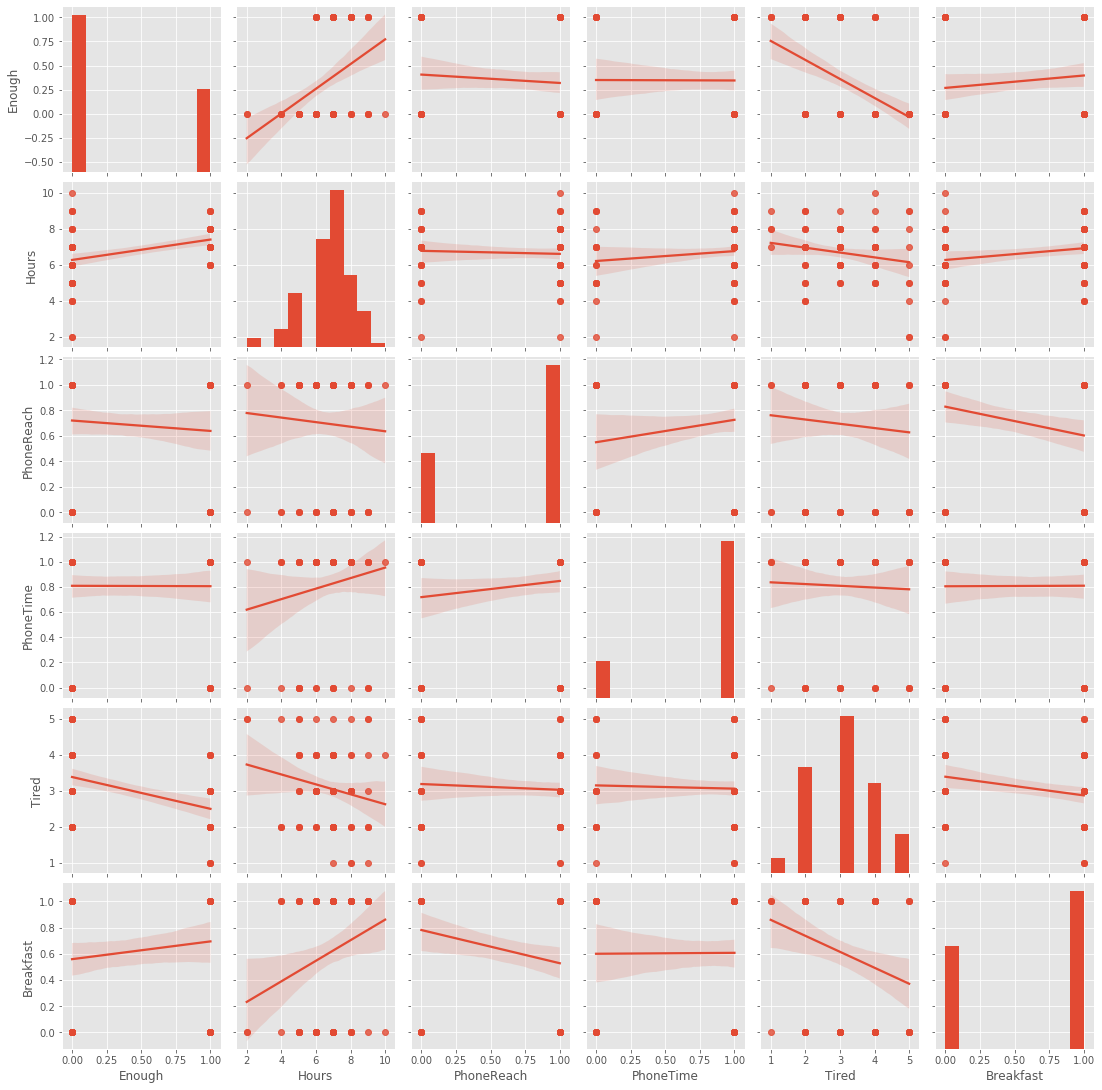

In [0]:
#wanted to see if the mean ran thru any plots. Saw a little correlation with hours and Tired
g = sns.pairplot(df, kind="reg")


Text(0.5, 1.0, 'Time Slept Compared to Enough Sleep')

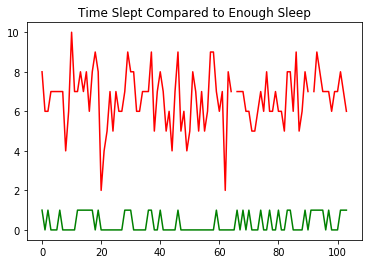

In [0]:
#Wanted to plot enough(green) against hours(red). If you slept between 6-8 hrs, you were more likely to say yes you slept well.  
plt.plot(df['Enough'], color = 'green')
plt.plot(df['Hours'], color = 'red')
plt.title('Time Slept Compared to Enough Sleep')

In [0]:
#Looked at columns mean
df[df.columns[0:7]].mean()

Enough        0.346154
Hours         6.656863
PhoneReach    0.692308
PhoneTime     0.807692
Tired         3.076923
Breakfast     0.605769
dtype: float64

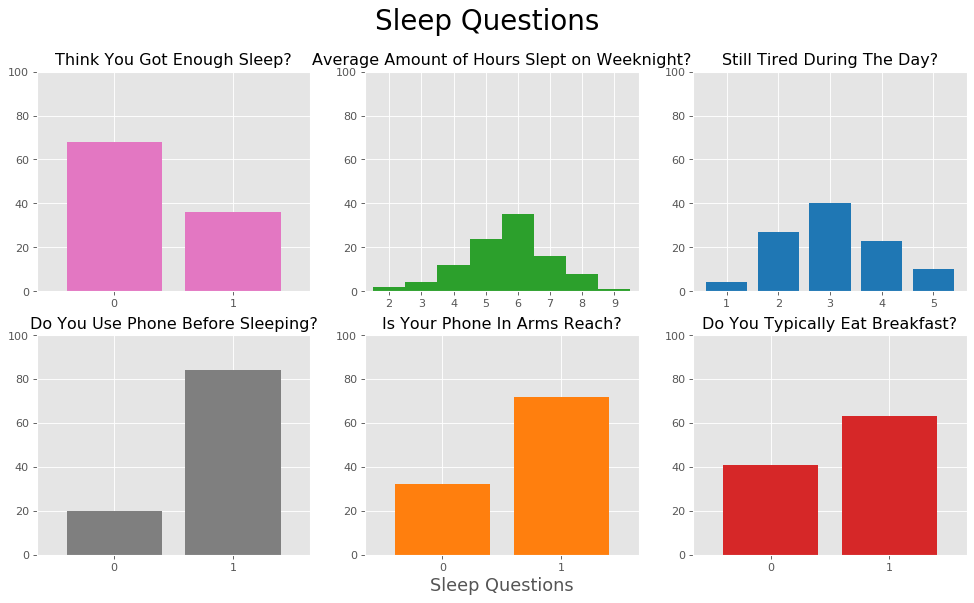

In [0]:
#Graphed all the columns in one.
fig = plt.figure(num=2, figsize=(15, 8),dpi=80)
plt.style.use('ggplot')

ax1 = fig.add_subplot(2,3,1)
df['Enough'].value_counts().sort_index().plot.bar(width=0.8,color = 'tab:pink')
ax1.set_xticklabels(range(0,7), rotation = 0)
ax1.set_ylim([0,100])
ax1.set_title('Think You Got Enough Sleep?')



ax2 = fig.add_subplot(2,3,2)
df['Hours'].value_counts().sort_index(0).plot.bar(width=1.0,color = 'tab:green')
ax2.set_xticklabels(range(2,11),rotation = 0)
ax2.set_ylim([0,100])
ax2.set_title('Average Amount of Hours Slept on Weeknight?')


ax3 = fig.add_subplot(2,3,3)
df['Tired'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:blue')
ax3.set_xticklabels(range(1,7),rotation = 0)

ax3.set_ylim([0,100])
ax3.set_title('Still Tired During The Day?')

ax4 = fig.add_subplot(2,3,4)
df['PhoneTime'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:grey')
ax4.set_xticklabels(range(0,2),rotation = 0)

ax4.set_ylim([0,100])
ax4.set_title('Do You Use Phone Before Sleeping?')

ax5 = fig.add_subplot(2,3,5)
df['PhoneReach'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:orange')
ax5.set_xticklabels(range(0,2),rotation = 0)
ax5.set_ylim([0,100])
ax5.set_xlabel('Sleep Questions', size=16)
ax5.set_title('Is Your Phone In Arms Reach?')

ax6 = fig.add_subplot(2,3,6)
df['Breakfast'].value_counts().sort_index(0).plot.bar(width=0.8,color = 'tab:red')
ax6.set_xticklabels(range(0,2),rotation = 0)
ax6.set_ylim([0,100])
ax6.set_title('Do You Typically Eat Breakfast?')


fig.suptitle('Sleep Questions',size = 25)
ax6.grid(True)
ax5.grid(True)
ax4.grid(True)
ax3.grid(True)
ax2.grid(True)
ax1.grid(True)

plt.savefig("df.png")
plt.show()

(104, 6)

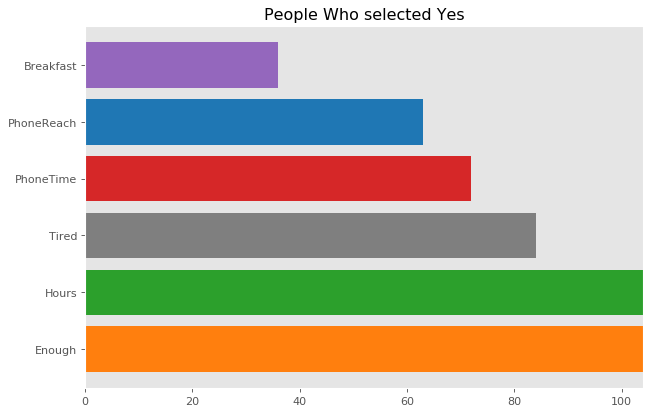

In [0]:
#Wanted to look at people who selected yes but I was unsure of how to change the range. 
fig = plt.figure(num=0, figsize=(9, 6),dpi=80)

plt.barh(range(1,7),df[df.columns[0:6]].sum().sort_values(ascending=False),color=('tab:orange', 'tab:green', 'tab:grey','tab:red','tab:blue', 'tab:purple'))
plt.yticks(range(1,7),('Enough', 'Hours', 'Tired', 'PhoneTime', 'PhoneReach', 'Breakfast'))
plt.title('People Who selected Yes')
plt.xlim([0, 104])
plt.grid(False)
df.shape
